<a href="https://colab.research.google.com/github/Chi123Zhang/frog-tail-regeneration/blob/main/Frog_and_tail_ChiZhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [ ]:
# Project 1: Frog Tail Regeneration – Identification of the ROC Cell
# Author: Chi Zhang
# Columbia University, Fall 2025
# Notebook for analysis and visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install anndata
!pip install scanpy
import scanpy as sc
adata = sc.read_h5ad("/content/drive/MyDrive/cleaned_processed_frogtail.h5ad")
adata
adata.X.todense()
adata.obs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00


/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



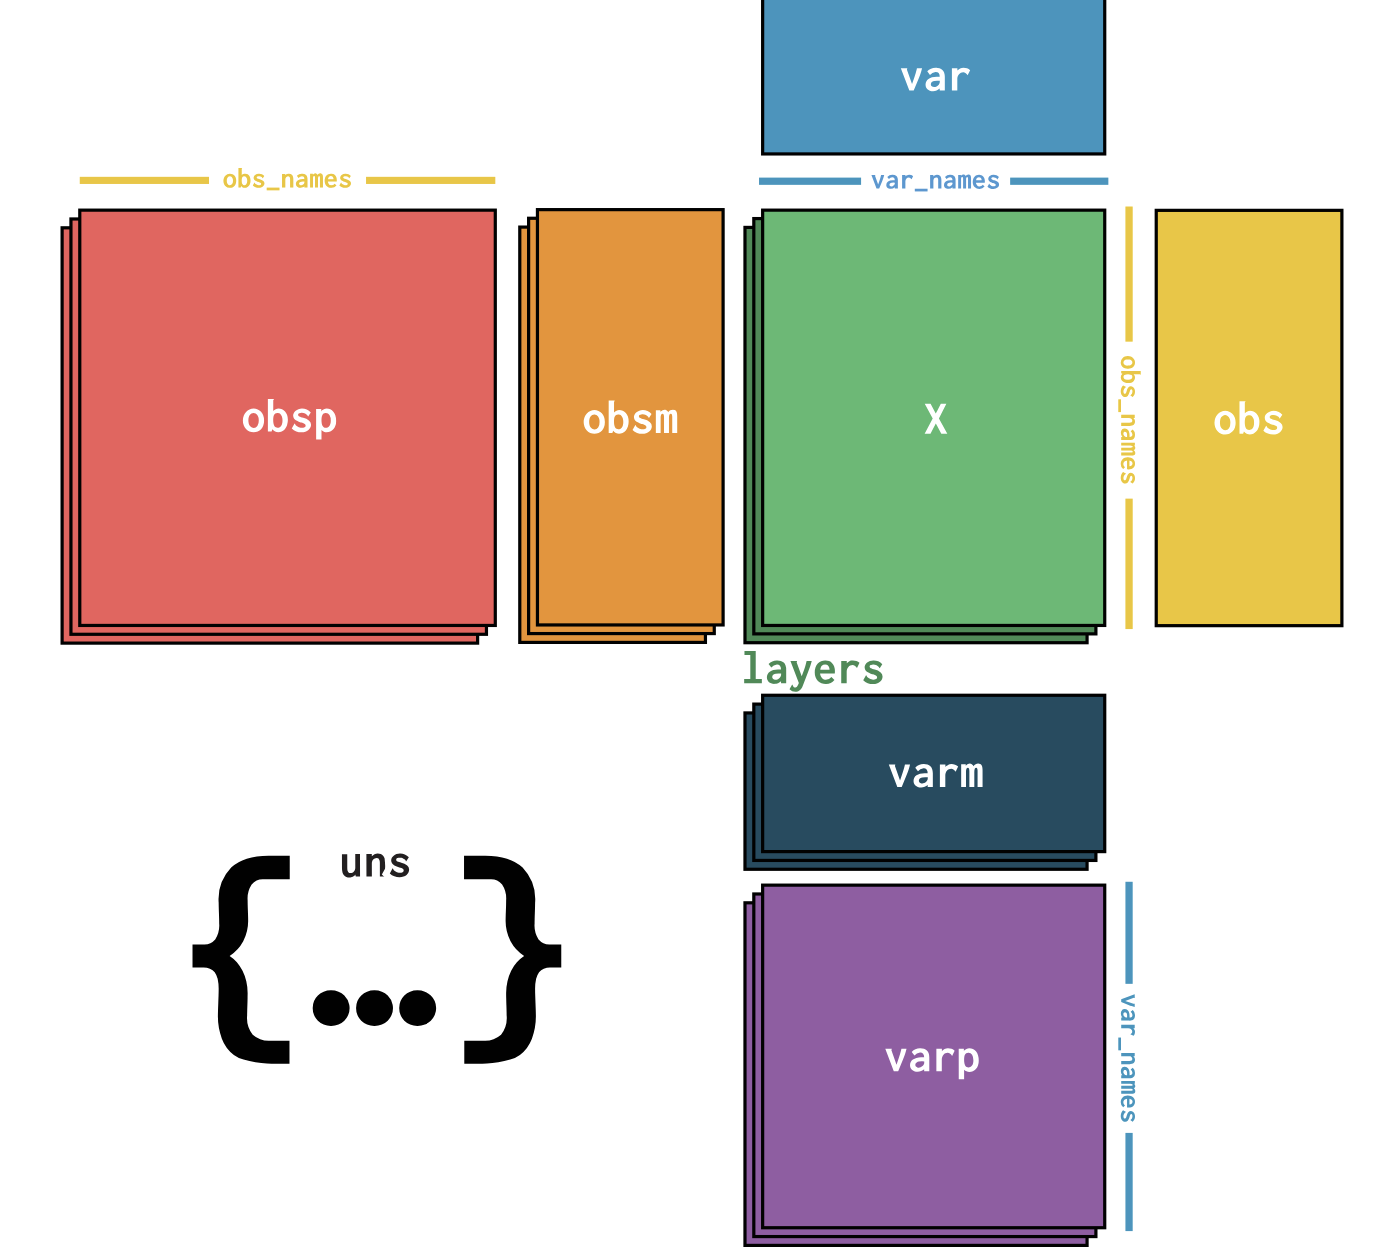

## Processing data

In [3]:
adata.layers["counts"] = adata.X.copy()


In [4]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [5]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

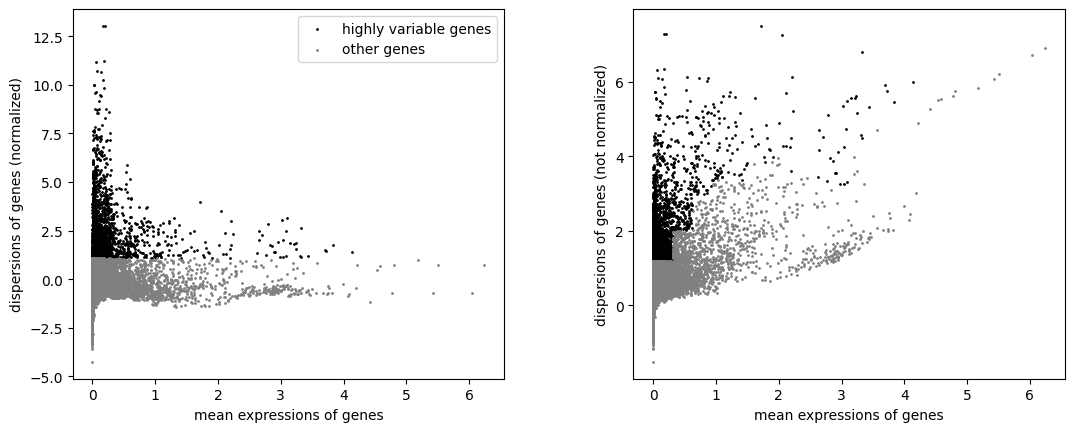

In [6]:
sc.pl.highly_variable_genes(adata)

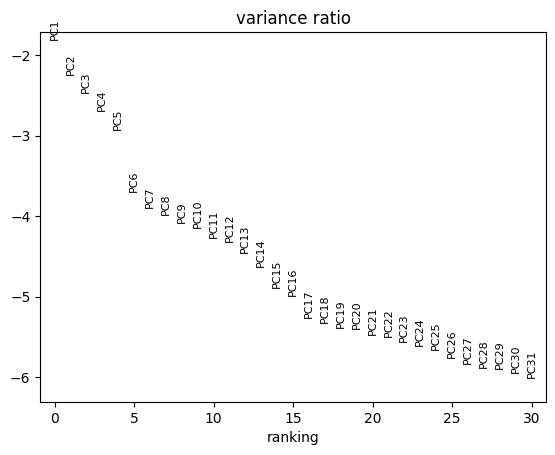

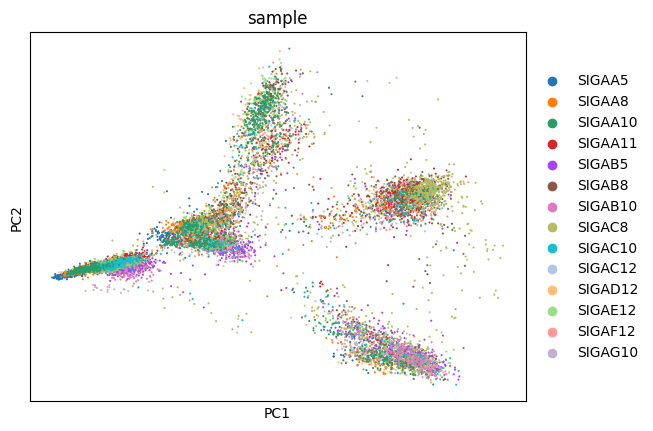

In [7]:
#PCA (dimensionality reduction)
sc.tl.pca(adata, svd_solver="arpack")
# PCA variance explanation rate (determine how many PCs to use)
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca(adata, color="sample")

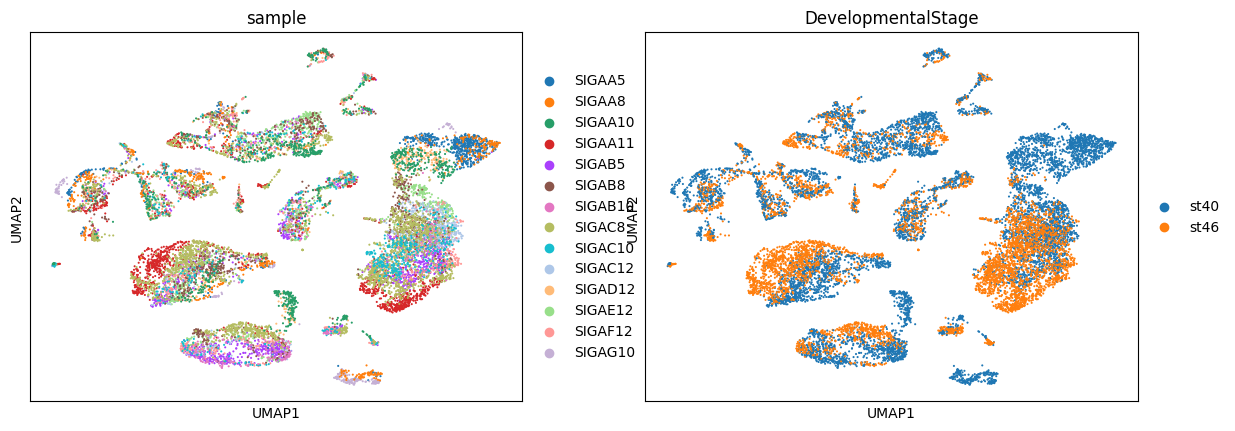

In [8]:
# Neighborhood Graph + UMAP (Visualization)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["sample", "DevelopmentalStage"])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.2 MB/s eta 0:00:00
  Created wheel for louvain: filename=louvain-0.8.2-cp312-cp312-linux_x86_64.whl size=971852 sha256=82e84597477f007d40949959c9443d4a47a5569306240e11c7ec2ef674597167
  Stored in directory: /root/.cache/pip/wheels/40/de/2b/bb7ed19d84727f9f299f20cd34c42bba9c8bef7d83d2255c86
Successfully built louvain


/tmp/ipython-input-2338604070.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


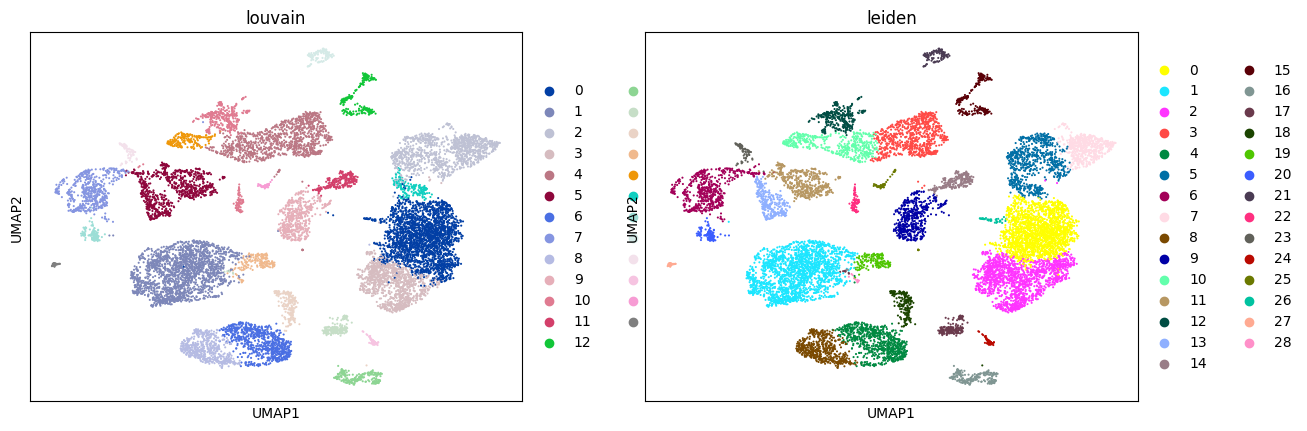

In [9]:
# Clustering (Louvain & Leiden, one run each)
!pip install python-igraph louvain leidenalg
# Louvain
sc.tl.louvain(adata, resolution=0.5)
# Leiden
sc.tl.leiden(adata, resolution=0.5)

# see cluster distribution
sc.pl.umap(adata, color=["louvain", "leiden"])

In [10]:
#Clustering quality assessment (ARI + Silhouette)
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np
import pandas as pd

# ARI: Comparison of Louvain and Leiden consistency
ari = adjusted_rand_score(adata.obs["louvain"], adata.obs["leiden"])

# Silhouette: Evaluate the compactness of Leiden clusters in PCA space
labels_leiden = adata.obs["leiden"].astype("category").cat.codes.values
sil = silhouette_score(adata.obsm["X_pca"], labels_leiden)

pd.DataFrame({"ARI_louvain_vs_leiden":[ari], "Silhouette_Leiden_on_PCs":[sil]})

ARI_louvain_vs_leiden  Silhouette_Leiden_on_PCs
0               0.811475                  0.295169

In [13]:
import scanpy as sc
print(sc.__version__)

1.11.4


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:461: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

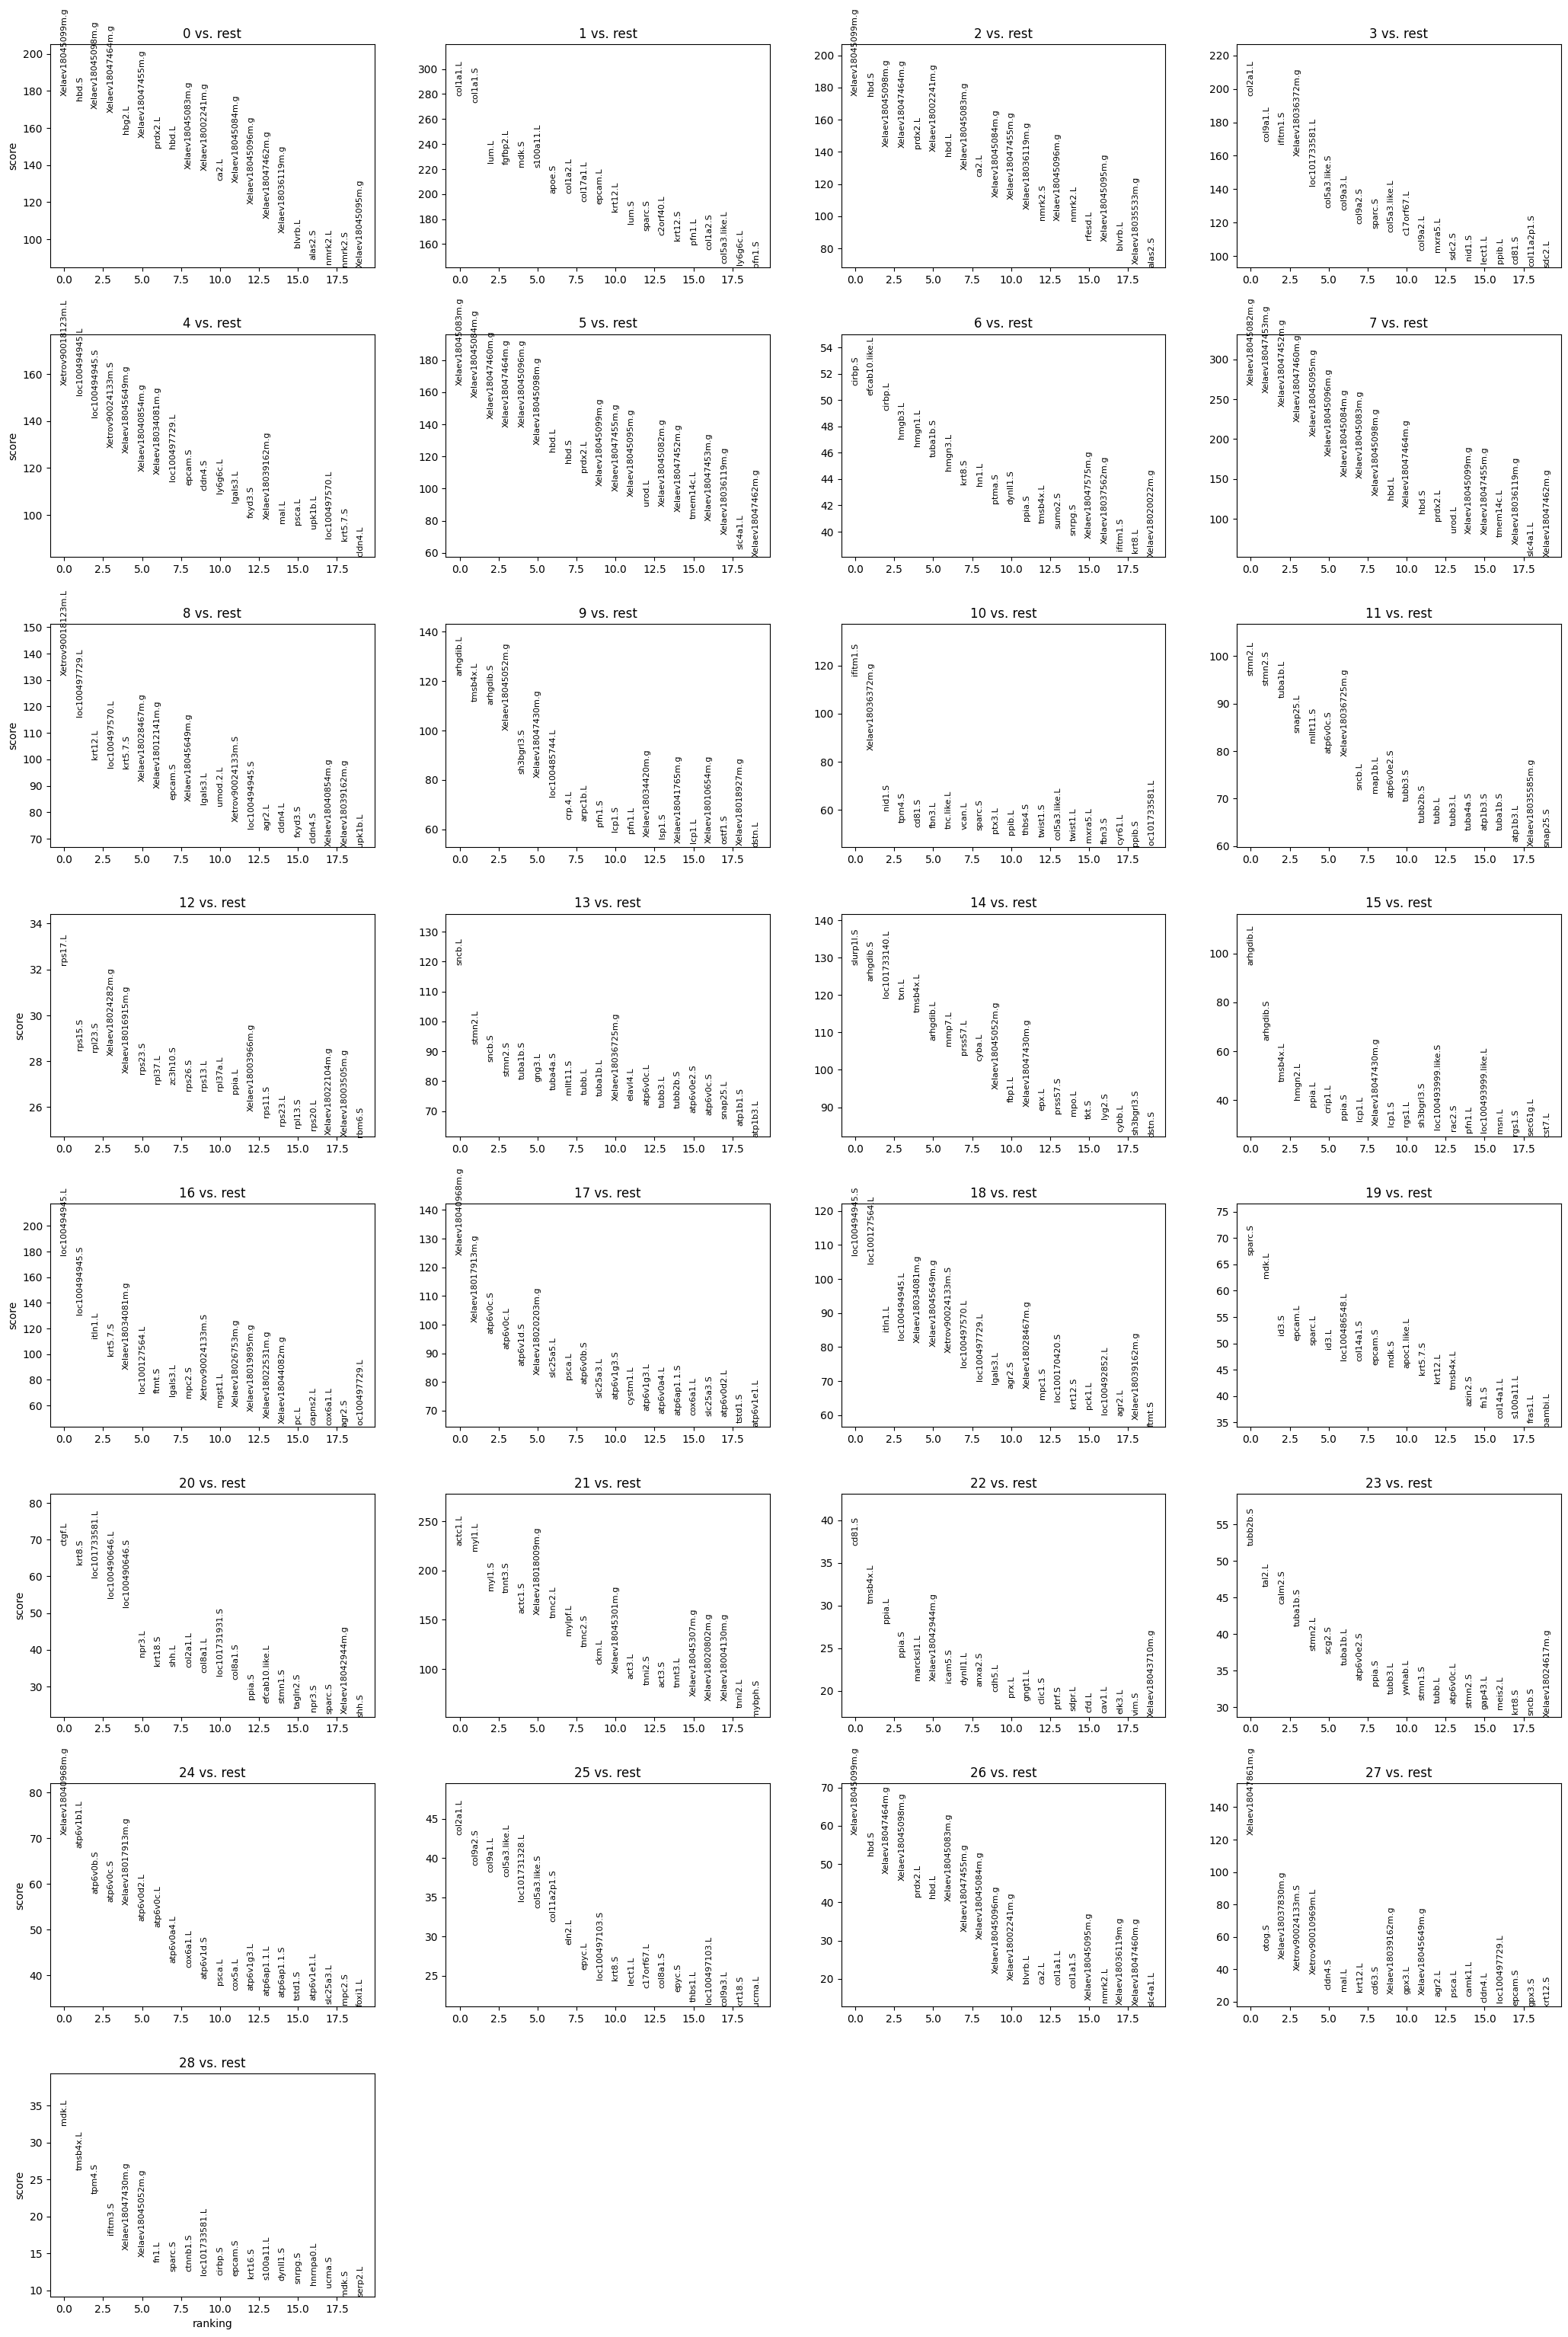

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


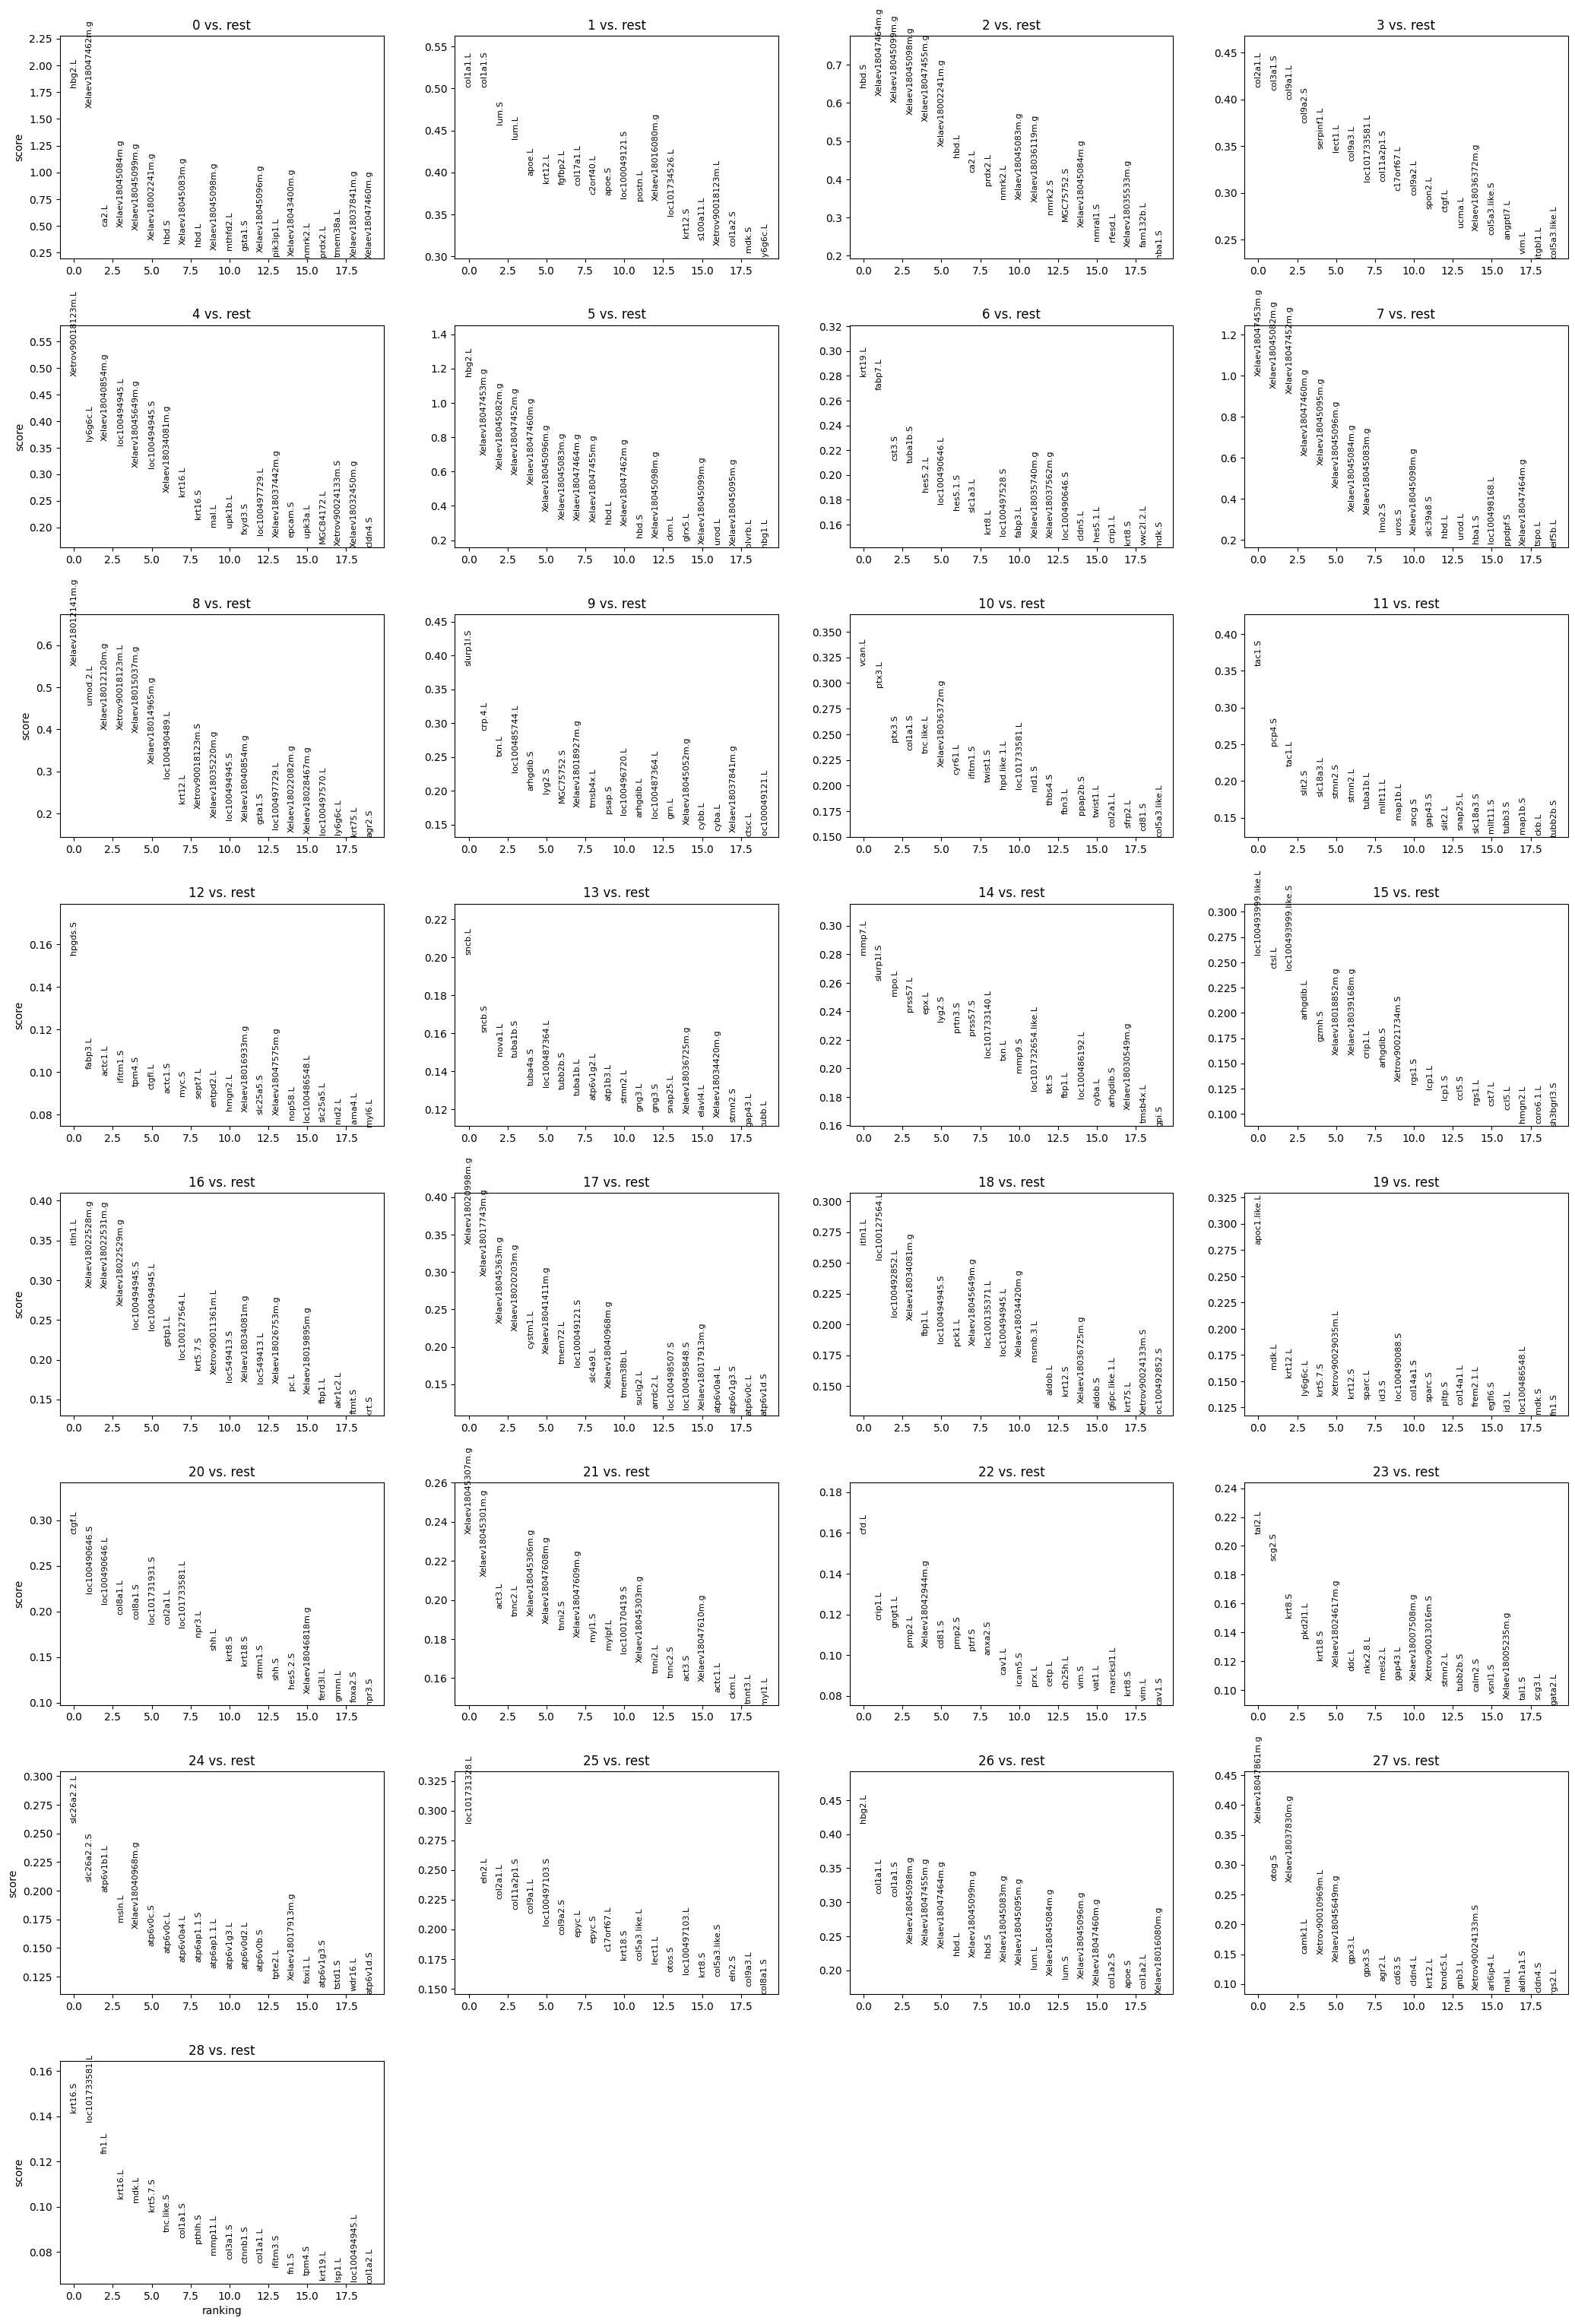

/tmp/ipython-input-1538737226.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")["names"].apply(lambda s: list(s.head(n))))


In [14]:
# Marker genes (two methods and comparison)
def topn_per_cluster(df, n=10):
    candidates = ["logfoldchanges", "logfoldchange", "lfc", "log2fc", "log2foldchange", "scores"]
    sort_col = next((c for c in candidates if c in df.columns), None)
    if sort_col is None:
        raise ValueError(f"No sortable column found; columns={df.columns.tolist()}")
    return (df.sort_values(["group", sort_col], ascending=[True, False])
              .groupby("group")["names"].apply(lambda s: list(s.head(n))))

# 1) t-test
sc.tl.rank_genes_groups(adata, groupby="leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
res_ttest = sc.get.rank_genes_groups_df(adata, group=None)

# 2) logistic regression
sc.tl.rank_genes_groups(adata, groupby="leiden", method="logreg")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
res_logreg = sc.get.rank_genes_groups_df(adata, group=None)

# 3) Top10 genes comparision
top10_ttest  = topn_per_cluster(res_ttest,  n=10)
top10_logreg = topn_per_cluster(res_logreg, n=10)

compare = pd.DataFrame({
    "ttest_top10":  top10_ttest,
    "logreg_top10": top10_logreg
})
compare
res_ttest.to_csv("markers_ttest_all.csv", index=False)
res_logreg.to_csv("markers_logreg_all.csv", index=False)
compare.to_csv("markers_top10_by_cluster.csv")

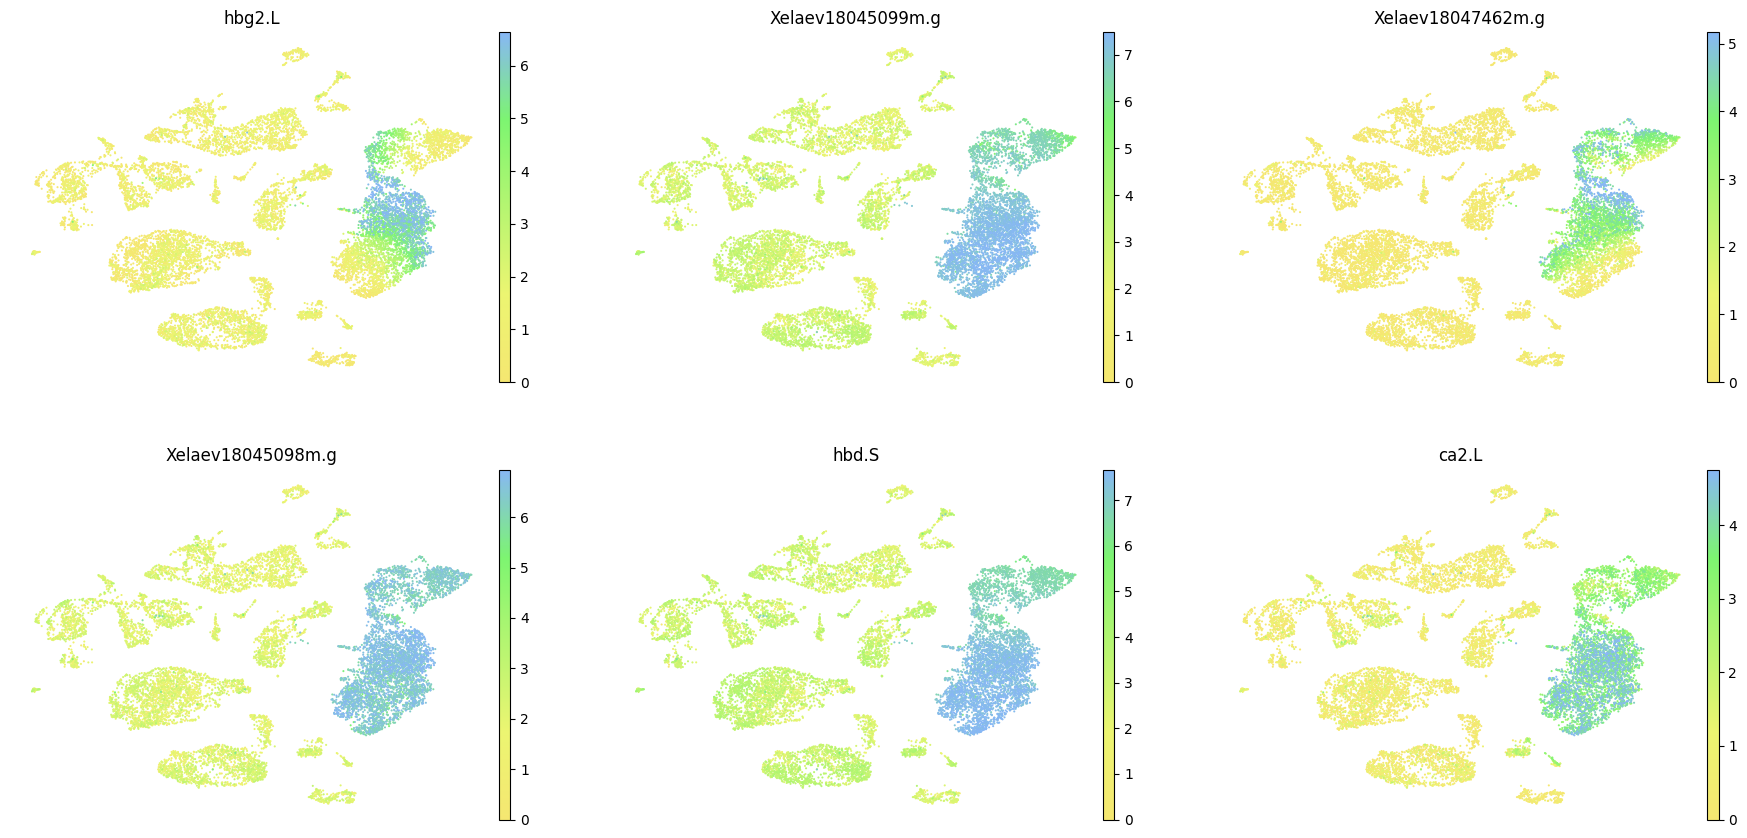

/tmp/ipython-input-2621190690.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color=[top10_ttest[0][0], top10_logreg[0][0]],


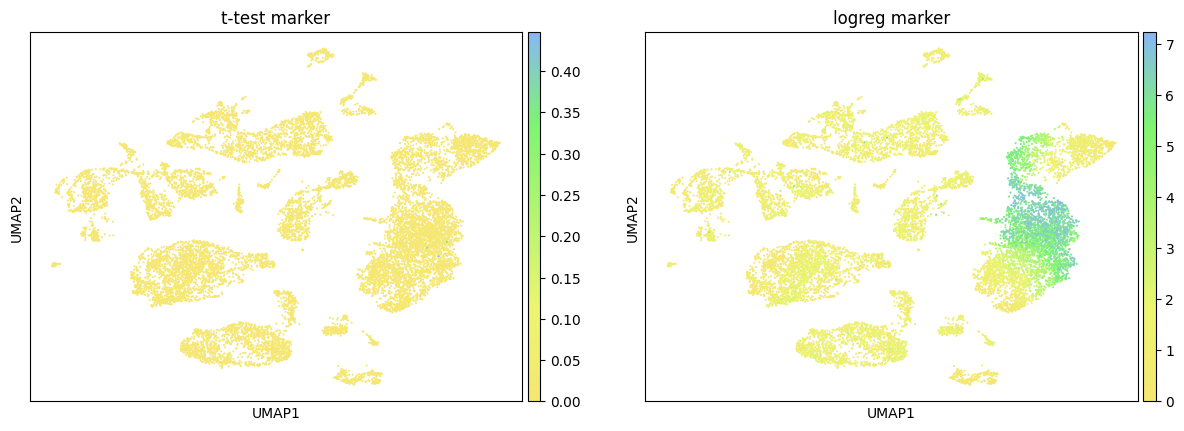

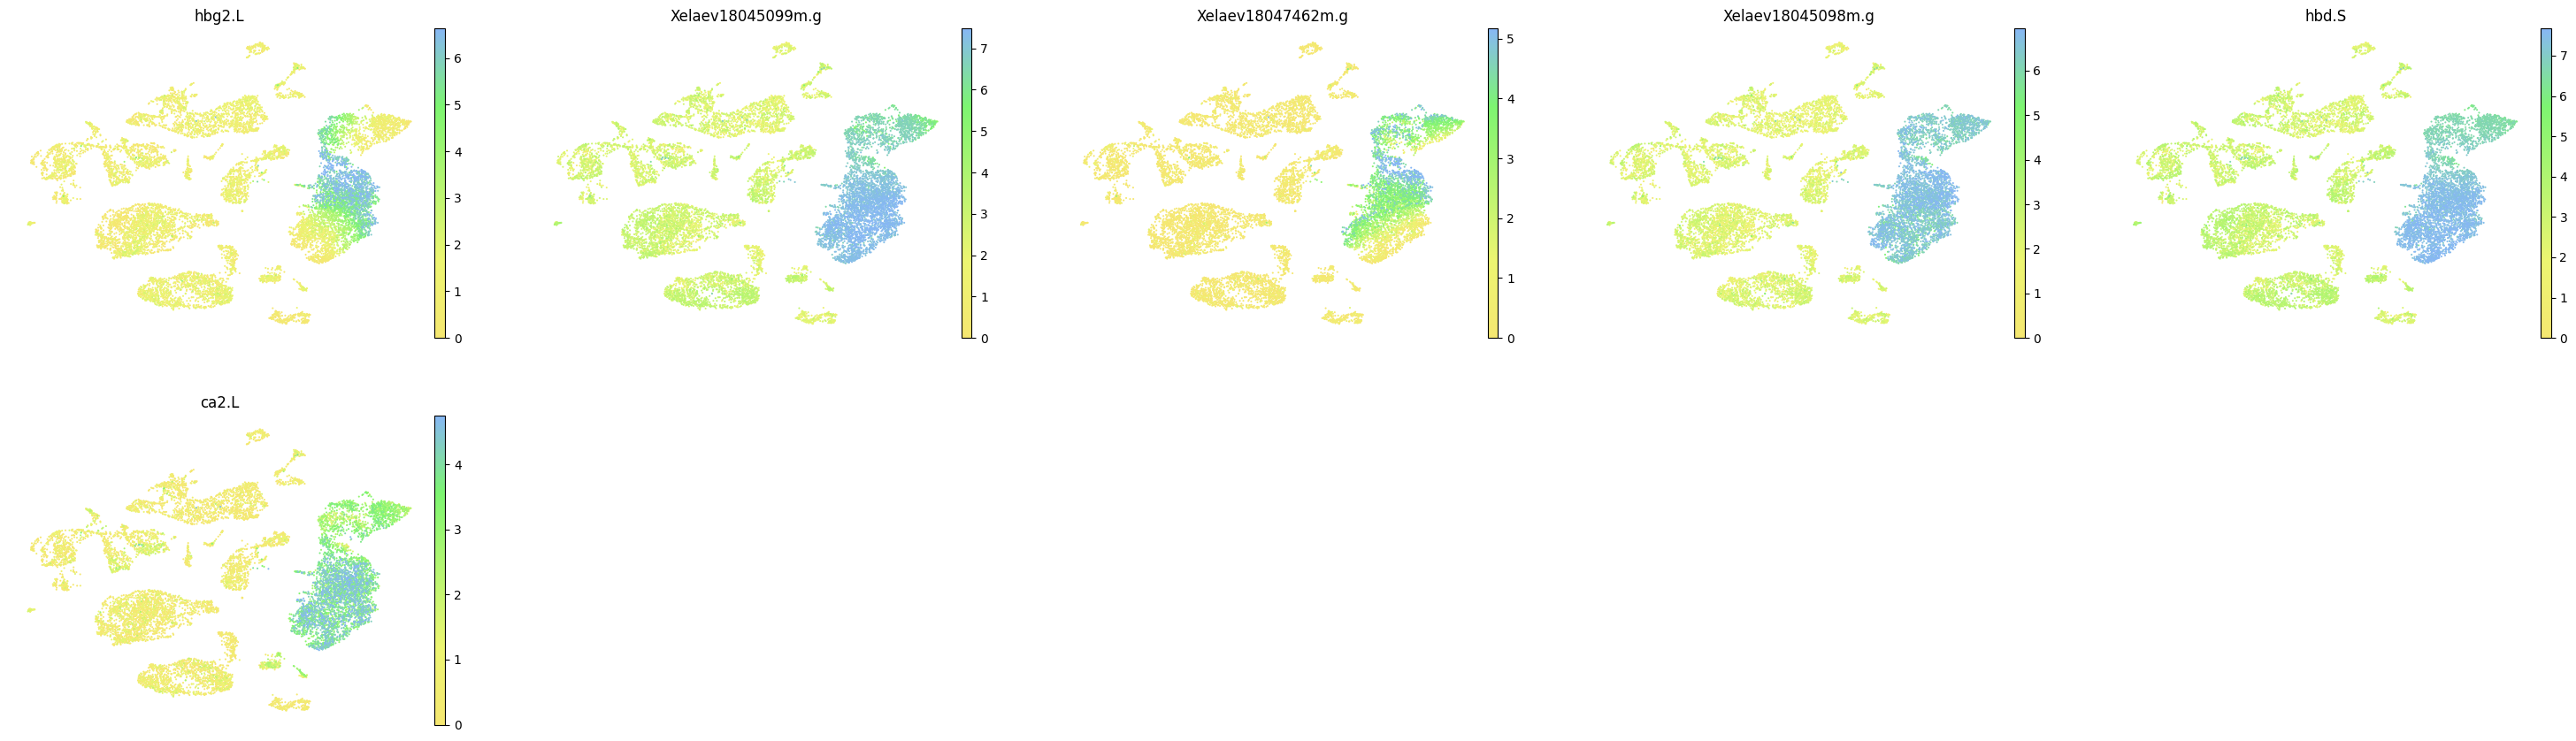

In [17]:
#Key marker coloring on UMAP
# Step 1: choose key markers
markers_to_show = list(set(
    res_ttest.query("group == '0'").sort_values("scores", ascending=False)["names"].head(3).tolist() +
    res_logreg.query("group == '0'").sort_values("scores", ascending=False)["names"].head(3).tolist()
))

# Step 2: custom color map
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    "frog_grad", ["#F5E771", "#ECF571", "#B5F571", "#7DF571", "#87B7F5"]
)

# Step 3: visualize these markers
sc.pl.umap(
    adata,
    color=markers_to_show,
    cmap=custom_cmap,
    frameon=False,
    ncols=3,
    vmin=0,
    vmax='p99'
)

sc.pl.umap(
    adata,
    color=[top10_ttest[0][0], top10_logreg[0][0]],
    title=["t-test marker", "logreg marker"],
    cmap=custom_cmap
)

#save plots
import matplotlib.pyplot as plt
fig = sc.pl.umap(
    adata,
    color=markers_to_show,
    cmap=custom_cmap,
    ncols=5,
    vmin=0,
    vmax='p99',
    frameon=False,
    show=False
)
plt.savefig("umap_marker_coloring.png", dpi=300, bbox_inches='tight')

In [42]:
#Data Denoising
# 1A. PCA Dimension Truncation + Remapping
# Based on the existing HVGs, redo PCA (take fewer principal components to suppress noise)
sc.tl.pca(adata, n_comps=30, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

# Reclustering & Indicators
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_denoise_pca30")
sc.tl.louvain(adata, resolution=0.5, key_added="louvain_denoise_pca30")

from sklearn.metrics import adjusted_rand_score, silhouette_score
ari_denoise = adjusted_rand_score(adata.obs["louvain_denoise_pca30"], adata.obs["leiden_denoise_pca30"])
sil_denoise = silhouette_score(adata.obsm["X_pca"][:, :30], adata.obs["leiden_denoise_pca30"].astype("category").cat.codes)
print("Denoise (PCA30) — ARI:", ari_denoise, " Silhouette:", sil_denoise)

# 1B. Regression/Standard Denoising + Neighborhood Smoothing
covars = [c for c in ["n_counts", "pct_counts_mt"] if c in adata.obs.columns]
if covars:
    sc.pp.regress_out(adata, keys=covars)

# Neighborhood smoothing: Use neighborhood mean smoothing to express (retain low-frequency noise)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)

sc.tl.leiden(adata, resolution=0.5, key_added="leiden_denoise_smooth")
sc.tl.louvain(adata, resolution=0.5, key_added="louvain_denoise_smooth")

ari_smooth = adjusted_rand_score(adata.obs["louvain_denoise_smooth"], adata.obs["leiden_denoise_smooth"])
sil_smooth = silhouette_score(adata.obsm["X_pca"], adata.obs["leiden_denoise_smooth"].astype("category").cat.codes)
print("Denoise (smooth) — ARI:", ari_smooth, " Silhouette:", sil_smooth)

Denoise (PCA30) — ARI: 0.8824982985274717  Silhouette: 0.3713322
Denoise (smooth) — ARI: 0.872378393168892  Silhouette: 0.37061435


In [43]:
# Batch Integration over time
#2A. Scanorama
!pip -q install scanorama
import scanorama

batch_key = "sample"


adatas = [adata[adata.obs[batch_key] == b].copy() for b in adata.obs[batch_key].unique()]
scanorama.integrate_scanpy(adatas, dimred=50)


adata_scan = adatas[0].concatenate(*adatas[1:], batch_key="scanorama_batch", index_unique=None)
adata_scan.obsm["X_scanorama"] = adata_scan.obsm["X_pca"]


sc.pp.neighbors(adata_scan, use_rep="X_scanorama")
sc.tl.umap(adata_scan)
sc.tl.leiden(adata_scan, resolution=0.5, key_added="leiden_scanorama")


sil_scan = silhouette_score(adata_scan.obsm["X_scanorama"], adata_scan.obs["leiden_scanorama"].astype("category").cat.codes)
print("Scanorama — Silhouette:", sil_scan)

# 2B. BBKNN
!pip -q install bbknn
import bbknn

adata_bbknn = adata.copy()
bbknn.bbknn(adata_bbknn, batch_key=batch_key, n_pcs=40)
sc.tl.umap(adata_bbknn)
sc.tl.leiden(adata_bbknn, resolution=0.5, key_added="leiden_bbknn")

sil_bbknn = silhouette_score(adata_bbknn.obsm["X_umap"], adata_bbknn.obs["leiden_bbknn"].astype("category").cat.codes)
print("BBKNN — Silhouette(UMAP):", sil_bbknn)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
Found 26166 genes among all datasets
[[0.         0.12133333 0.56299213 0.27272727 0.63665595 0.06227106
  0.21344801 0.51225204 0.08745247 0.38846154 0.46446384 0.32177531
  0.2173913  0.56378601]
 [0.         0.         0.12266667 0.54       0.04       0.6043956
  0.06666667 0.01866978 0.77376426 0.04       0.06666667 0.016
  0.428      0.02057613]
 [0.         0.         0.         0.68181818 0.57234727 0.32600733
  0.22047244 0.66141732 0.16730038 0.70551181 0.34094488 0.46771654
  0.41304348 0.3744856 ]
 [0.         0.         0.         0.         0.19128788 0.2967033
  0.15151515 0.36742424 0.35741445 0.44128788 0.17992424 0.21969697
  0.84280303 0.0617284 ]
 [0.         0.         0.         0.         0.         0.11721612
  0.11254019 0.77974277 0.05513308 0.31511254 0.189710

/tmp/ipython-input-1188919603.py:14: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_scan = adatas[0].concatenate(*adatas[1:], batch_key="scanorama_batch", index_unique=None)


Scanorama — Silhouette: 0.37061435
BBKNN — Silhouette(UMAP): 0.5103715


In [65]:
#download and open table 3
# Step 0: Read S3 Excel files into a {sheet_name -> set(genes)} structure
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

S3_PATH = "/content/drive/MyDrive/aav9996_tables3.xlsx"
xls = pd.ExcelFile(S3_PATH)

print("Sheets in file:", xls.sheet_names)

s3_sets = {}
for sh in xls.sheet_names:
    df = pd.read_excel(xls, sh)
    genes = (
        df.iloc[:, 0]
          .dropna()
          .astype(str).str.strip()
          .tolist()
    )
    s3_sets[sh] = set(genes)

for k in ["ROC markers", "WNT ligands", "FGF ligands", "WNT receptors"]:
    if k in s3_sets:
        print(k, len(s3_sets[k]))

Mounted at /content/drive
Sheets in file: ['S-phase genes', 'G2M genes', 'FGF ligands', 'WNT ligands', 'BMP ligands', 'DELTA ligands', 'TGFß ligands', 'FGF receptors', 'WNT receptors', 'BMP receptors', 'NOTCH receptors', 'TGFß receptors', 'ROC markers']
ROC markers 44
WNT ligands 13
FGF ligands 28
WNT receptors 27


In [66]:
# Identify and validate the ROC-like cluster by comparison with Supplementary Table 3 gene modules”
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
xls = pd.ExcelFile("/content/drive/MyDrive/aav9996_tables3.xlsx")  # ✅ 注意是 tables3.xlsx
print("Sheets in file:", xls.sheet_names)

import re
import pandas as pd

# ---------- 1)Normalization of unified names ----------
def norm(s):
    s = str(s).strip()
    s = re.sub(r"[\u200b-\u200d\uFEFF]", "", s)
    s = re.sub(r"[^A-Za-z0-9]", "", s)
    s = s.lower()
    s = re.sub(r"(l|s|t|x)$", "", s)
    return s

# ---------- 2) Make each S3 sheet into a normalized set ----------
s3_sets_norm = {name: {norm(g) for g in genes} for name, genes in s3_sets.items()}

def top_genes_of_cluster(res_df, cluster, n=50):
    cand_cols = ["logfoldchanges", "log2fc", "lfc", "scores"]
    sort_col = next((c for c in cand_cols if c in res_df.columns), None)
    if sort_col is None:
        raise ValueError(f"No sortable col in {res_df.columns.tolist()}")

    sub = res_df[res_df["group"].astype(str) == str(cluster)]
    genes = (
        sub.sort_values(sort_col, ascending=False)["names"]
           .head(n).astype(str).tolist()
    )
    return genes

# ---------- 3) "scan all clusters" to see which one looks most like ROC/skin ----------
def find_best_cluster_for(sheet_key="ROC markers", method="logreg", n=50):
    res_df = res_logreg if method == "logreg" else res_ttest
    target = s3_sets_norm.get(sheet_key, set())
    if not target:
        raise ValueError(f"There is no sheet {sheet_key} in S3")

    rows = []
    for clu in sorted(res_df["group"].astype(str).unique(), key=lambda x: int(x)):
        my = {norm(g) for g in top_genes_of_cluster(res_df, clu, n=n)}
        inter = my & target
        jacc = len(inter) / (len(my | target) + 1e-9)
        rows.append({
            "cluster": clu,
            "method": method,
            "topN": n,
            "overlap_count": len(inter),
            "overlap_pct_of_my": 100*len(inter)/(len(my) or 1),
            "jaccard": jacc,
            "preview": sorted(list(inter))[:8],
        })
    df = pd.DataFrame(rows).sort_values(["overlap_count","jaccard"], ascending=False)
    return df

# use logreg to find the cluster that has the most intersection with "ROC markers"
df_roc = find_best_cluster_for(sheet_key="ROC markers", method="logreg", n=200)
display(df_roc.head(10))

best_clu = df_roc.iloc[0]["cluster"]
print("最像 ROC 的 cluster（logreg, top50）=>", best_clu)

# ---------- 4) On "this ROC/skin cluster", compare with multiple ligand/receptor tables ----------
def compare_one_cluster_to_S3(cluster, method="logreg", n=50,
                              sheets=("WNT ligands","FGF ligands","BMP ligands",
                                      "DELTA ligands","TGFß ligands",
                                      "FGF receptors","WNT receptors",
                                      "BMP receptors","NOTCH receptors","TGFß receptors",
                                      "ROC markers")):
    res_df = res_logreg if method=="logreg" else res_ttest
    my = {norm(g) for g in top_genes_of_cluster(res_df, cluster, n=n)}
    rows = []
    for name in sheets:
        target = s3_sets_norm.get(name, set())
        inter = my & target
        rows.append({
            "S3_set": name,
            "overlap_count": len(inter),
            "overlap_pct_of_my": 100*len(inter)/(len(my) or 1),
            "jaccard": len(inter)/(len(my|target) or 1),
            "size_S3": len(target),
            "hit_genes": sorted(list(inter))[:10],
        })
    df = pd.DataFrame(rows).sort_values(["overlap_count","jaccard"], ascending=False)
    return df

df_hit = compare_one_cluster_to_S3(best_clu, method="logreg", n=50)
display(df_hit)

print("cluster", best_clu, "top20 genes (logreg):")
print(top_genes_of_cluster(res_logreg, best_clu, n=20))


Mounted at /content/drive
Sheets in file: ['S-phase genes', 'G2M genes', 'FGF ligands', 'WNT ligands', 'BMP ligands', 'DELTA ligands', 'TGFß ligands', 'FGF receptors', 'WNT receptors', 'BMP receptors', 'NOTCH receptors', 'TGFß receptors', 'ROC markers']


cluster  method  topN  overlap_count  overlap_pct_of_my   jaccard  \
19      19  logreg   200             16           9.039548  0.078049   
28      28  logreg   200              4           2.298851  0.018692   
1        1  logreg   200              3           1.704545  0.013825   
22      22  logreg   200              2           1.197605  0.009569   
12      12  logreg   200              2           1.129944  0.009132   
25      25  logreg   200              1           0.598802  0.004762   
6        6  logreg   200              1           0.571429  0.004587   
20      20  logreg   200              1           0.564972  0.004545   
0        0  logreg   200              0           0.000000  0.000000   
2        2  logreg   200              0           0.000000  0.000000   

                                              preview  
19  [cpa6, dlx2, egfl6, fgf7, fgf9, fgfr4, frem2, ...  
28                       [egfl6, frem2, igfbp2, tp73]  
1                              [egfl6, frem2, igfbp2]  
22                                      [nid2, robo4]  
12                                      [lamb1, nid2]  
25                                             [nid2]  
6                                              [jag1]  
20                                             [nid2]  
0                                                  []  
2                                                  []

最像 ROC 的 cluster（logreg, top50）=> 19


S3_set  overlap_count  overlap_pct_of_my   jaccard  size_S3  \
10      ROC markers              3           6.976744  0.035714       44   
0       WNT ligands              0           0.000000  0.000000        9   
1       FGF ligands              0           0.000000  0.000000       19   
2       BMP ligands              0           0.000000  0.000000        7   
3     DELTA ligands              0           0.000000  0.000000        4   
4      TGFß ligands              0           0.000000  0.000000        2   
5     FGF receptors              0           0.000000  0.000000        4   
6     WNT receptors              0           0.000000  0.000000       16   
7     BMP receptors              0           0.000000  0.000000        3   
8   NOTCH receptors              0           0.000000  0.000000        2   
9    TGFß receptors              0           0.000000  0.000000        2   

              hit_genes  
10  [egfl6, nid2, pltp]  
0                    []  
1                    []  
2                    []  
3                    []  
4                    []  
5                    []  
6                    []  
7                    []  
8                    []  
9                    []

['apoc1.like.L', 'mdk.L', 'krt12.L', 'ly6g6c.L', 'krt5.7.S', 'Xetrov90029035m.L', 'krt12.S', 'sparc.L', 'id3.S', 'loc100490088.S', 'col14a1.S', 'sparc.S', 'pltp.S', 'col14a1.L', 'frem2.1.L', 'egfl6.S', 'id3.L', 'loc100486548.L', 'mdk.S', 'fn1.S']
cluster 19 top20 genes (logreg):


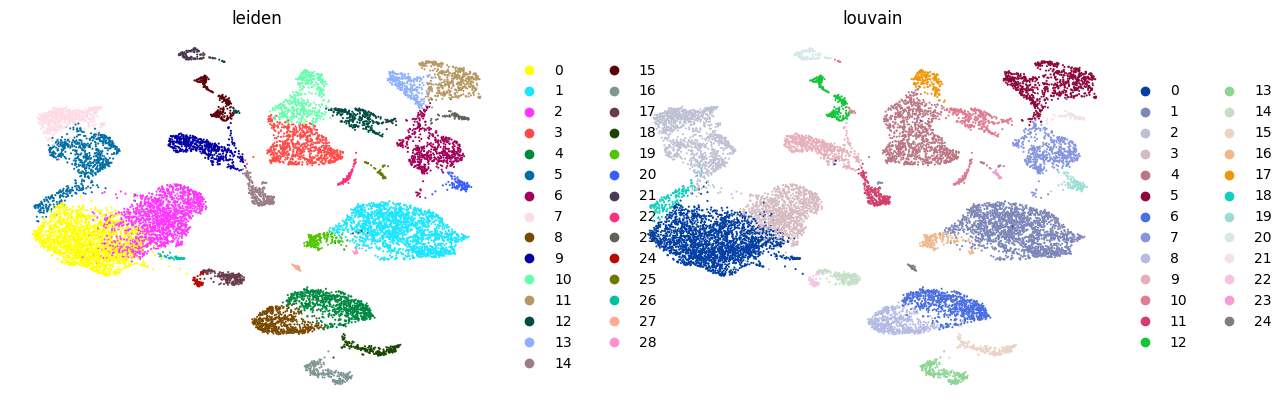

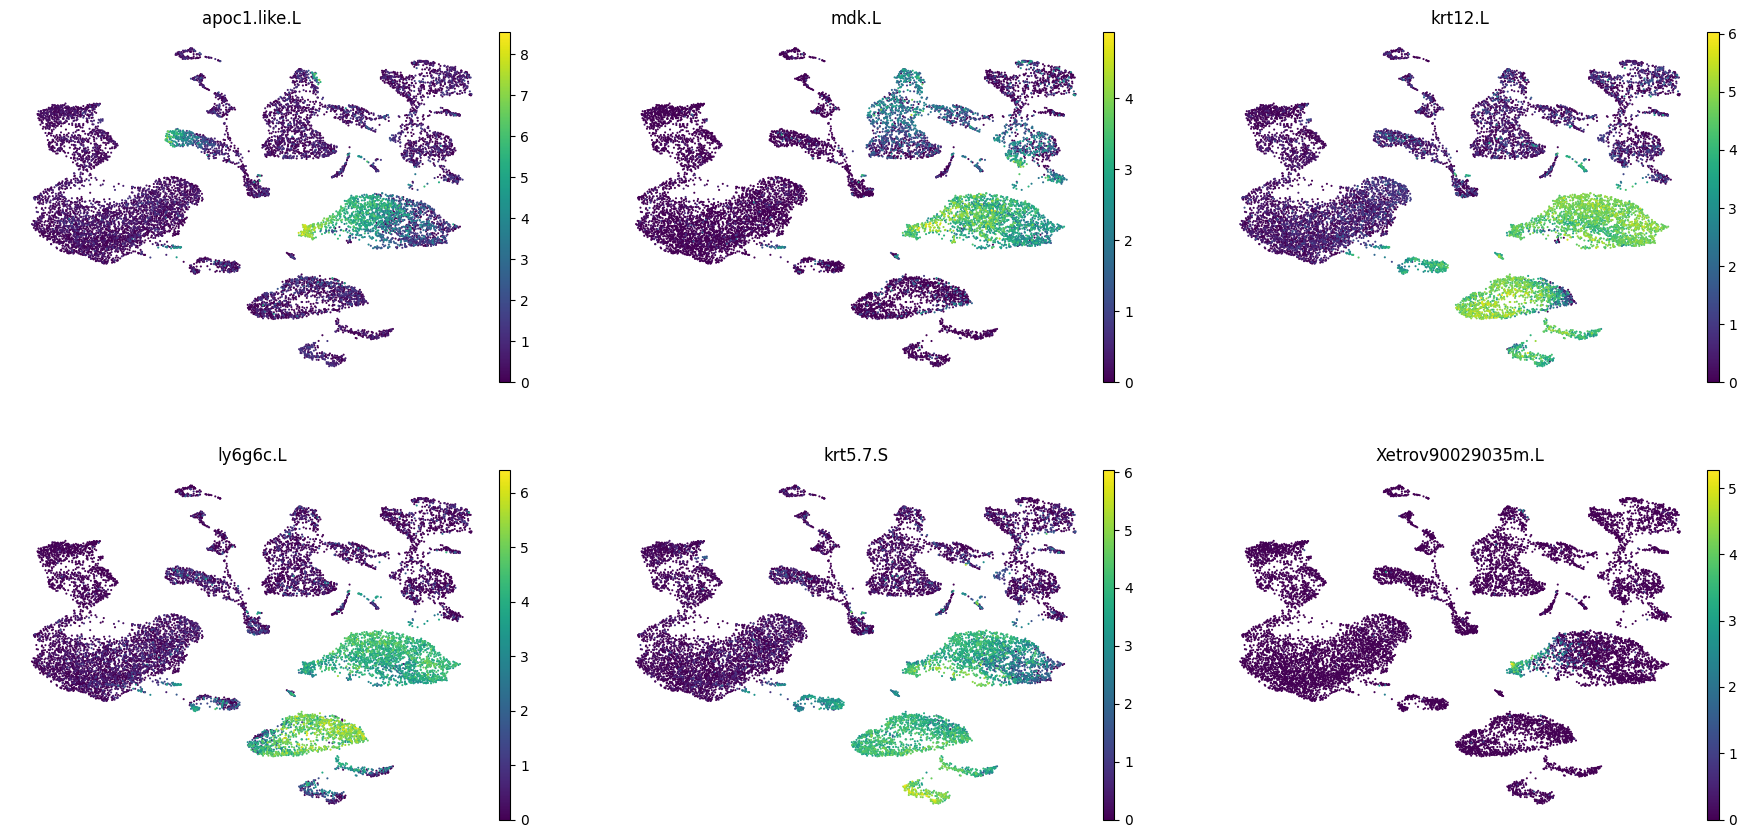

In [67]:
# UMAP: Coloring by Leiden/Louvain
fig1 = sc.pl.umap(adata, color=["leiden", "louvain"], ncols=2, frameon=False, return_fig=True)
fig1.savefig("/content/drive/MyDrive/fig1_clustering.png", dpi=300, bbox_inches="tight")

# Select the top marker (logreg or t-test) of the ROC-like cluster to draw the expression
roc_cluster = "19"
top_genes = top_genes_of_cluster(res_logreg, roc_cluster, n=6)
fig2 = sc.pl.umap(adata, color=top_genes, ncols=3, frameon=False, return_fig=True)
fig2.savefig("/content/drive/MyDrive/fig2_markers.png", dpi=300, bbox_inches="tight")

In [44]:
# save result
adata.write("/content/drive/MyDrive/Frogtail_processed_results.h5ad", compression="gzip")